In [57]:
import matplotlib.pyplot as plt
from matplotlib import style

import pandas as pd
import json

plt.style.use('seaborn-paper')

/var/folders/mv/q6zcw1v57z10p_29bs0r69lh0000gn/T/ipykernel_84552/1657866577.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [48]:
def load_data(file):
    lines = []
        
    with open(file, 'r') as f:
        for line in f:
            lines += [json.loads(line)]
            
    df = pd.DataFrame(lines)
    
    return df

In [49]:
rnn = load_data('../benchmarks/logs/rnn_metrics.json')
gru = load_data('../benchmarks/logs/large_gru_metrics.json')
lstm = load_data('../benchmarks/logs/large_lstm_metrics.json')

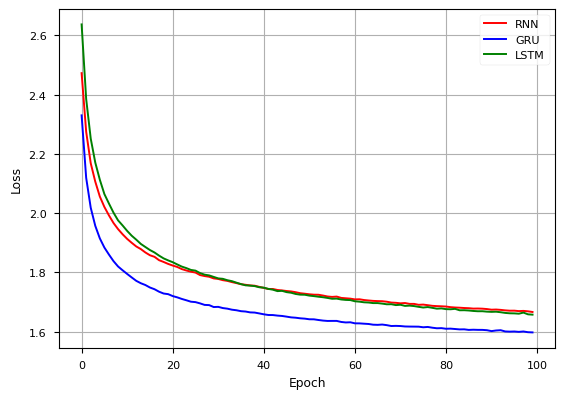

In [64]:
fig, ax = plt.subplots()

rnn_line, = ax.plot(rnn.loc[~rnn['epoch'].isna(), 'Bits per character'], label='RNN', c='r')
gru_line, = ax.plot(gru.loc[~gru['epoch'].isna(), 'Bits per character'], label='GRU', c='b')
lstm_line, = ax.plot(lstm.loc[~lstm['epoch'].isna(), 'Bits per character'], label='LSTM', c='g')

ax.legend(handles=[rnn_line, gru_line, lstm_line])

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

plt.grid()
plt.show()

fig.savefig('rnn_cell_performance.pdf')

In [65]:
ensemble_8_data = load_data('../benchmarks/logs/8_ensemble_rnn_metrics.json') 

In [88]:
columns = ['Categorical Accuracy', 'Perplexity', 'Bits per character']

result = []
    
for column in columns:
    value = ensemble_8_data.loc[ensemble_8_data['epoch'] == 99, column].tolist()[0]
    result += [value['base_metric_evaluation'] + [value['metric_evaluation']]]
        
for column in columns:
    value = ensemble_8_data.loc[ensemble_8_data['test'] == True, column].tolist()[0]
    result += [value['base_metric_evaluation'] + [value['metric_evaluation']]]

out_str = ''

for row in list(zip(*result)):
    out_str += ' & '.join([f"{value:.3f}" for value in row]) + "\n"


print(out_str)

0.537 & 5.631 & 2.373 & 0.530 & 5.882 & 2.425
0.544 & 5.759 & 2.400 & 0.536 & 6.033 & 2.456
0.539 & 5.608 & 2.368 & 0.533 & 5.873 & 2.424
0.538 & 6.347 & 2.519 & 0.530 & 6.821 & 2.612
0.538 & 5.587 & 2.364 & 0.530 & 5.832 & 2.415
0.529 & 5.626 & 2.372 & 0.521 & 5.819 & 2.412
0.535 & 5.558 & 2.357 & 0.527 & 5.755 & 2.399
0.531 & 5.533 & 2.352 & 0.524 & 5.765 & 2.401
0.582 & 4.145 & 2.036 & 0.573 & 4.292 & 2.072



In [70]:
ensemble_8_data[ensemble_8_data['test'] == True]

Categorical Accuracy  \
102  {'base_metric_evaluation': [0.5302734375, 0.53...   

                                            Perplexity  \
102  {'base_metric_evaluation': [5.882188320159912,...   

                                    Bits per character  epoch  test  
102  {'base_metric_evaluation': [2.425323724746704,...    NaN  True